In [4]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter)
from dike_model_function import DikeNetwork  # @UnresolvedImport


def sum_over(*args):
    return sum(args)

In [6]:
from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario)

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation


ema_logging.log_to_stderr(ema_logging.INFO)

dike_model, planning_steps = get_model_for_problem_formulation(2)

In [7]:
# with RfR policy
RfR_policy = {'DikeIncrease': 0, 'DaysToThreat': 0, 'RfR': 1}

policy1 = {}
for key in dike_model.levers:
    s1, s2 = key.name.split('_')
    if ' ' in s2:
        s2, s3 = s2.split(' ')
    policy1.update({key.name: RfR_policy[s2]})                

policy1 = Policy('Policy 1', **policy1)

In [51]:
from ema_workbench import (MultiprocessingEvaluator, ema_logging,
                           perform_experiments, SequentialEvaluator)
ema_logging.log_to_stderr(ema_logging.INFO)
 
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=10000, policies=policy1)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 10000 scenarios * 1 policies * 1 model(s) = 10000 experiments
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] 2000 cases completed
[MainProcess/INFO] 3000 cases completed
[MainProcess/INFO] 4000 cases completed
[MainProcess/INFO] 5000 cases completed
[MainProcess/INFO] 6000 cases completed
[MainProcess/INFO] 7000 cases completed
[MainProcess/INFO] 8000 cases completed
[MainProcess/INFO] 9000 cases completed
[MainProcess/INFO] 10000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [53]:
from ema_workbench import save_results
from ema_workbench import load_results

experiments, outcomes = results
save_results(results, "10000runs_RfRpolicy.tar.gz")

[MainProcess/INFO] results saved successfully to C:\Users\anja\Desktop\EPA\Quarter4\Model-based-decision-making\epa1361_open-master\final assignment\10000runs_RfRpolicy.tar.gz


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
813,74.0,165.349138,10,0.339445,112.307979,1,0.603828,154.362785,1,0.235750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,813,Policy 1,dikesnet
204,3.0,105.185691,10,0.092820,148.283178,1.5,0.806910,293.126781,1.5,0.789502,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,204,Policy 1,dikesnet
142,11.0,340.737355,1.5,0.156368,163.403497,10,0.597126,292.611707,10,0.129642,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,142,Policy 1,dikesnet
84,93.0,113.779087,10,0.691264,304.154959,1,0.031826,142.888706,10,0.060213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84,Policy 1,dikesnet
543,130.0,86.007924,1,0.919781,246.945649,10,0.276605,150.686418,1.5,0.106643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,543,Policy 1,dikesnet
661,75.0,272.381846,1,0.678632,135.544490,1.5,0.407216,336.168619,10,0.759138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,661,Policy 1,dikesnet
960,12.0,261.144160,1.5,0.747883,252.669455,1.5,0.527006,248.293999,1.5,0.498445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,960,Policy 1,dikesnet
696,66.0,237.087527,1,0.941780,189.407798,10,0.147176,223.988299,1.5,0.601732,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,696,Policy 1,dikesnet
511,113.0,178.628174,1,0.083288,233.841013,1,0.541261,284.574187,1,0.842244,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,511,Policy 1,dikesnet
316,71.0,79.137985,1,0.373107,127.807350,1.5,0.097124,247.974137,1,0.416229,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,316,Policy 1,dikesnet


In [109]:
#pd.DataFrame.from_dict(experiments).sample(10)
#experiments.head()
x = experiments.filter(regex=r'(wave shape$|Bmax$|pfail$|Brate$|^discount)') 
x.head()
# data = outcomes['Expected Number of Deaths']
# y = data > 0
damage_threshold = np.percentile(outcomes['Expected Annual Damage'], 20)
y = outcomes['Expected Annual Damage'] < damage_threshold

In [110]:
from ema_workbench.analysis import prim

ema_logging.log_to_stderr(ema_logging.INFO)

prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()

[MainProcess/INFO] 10000 points remaining, containing 2000 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.0649, coverage: 0.3245, density: 1.0 restricted_dimensions: 6


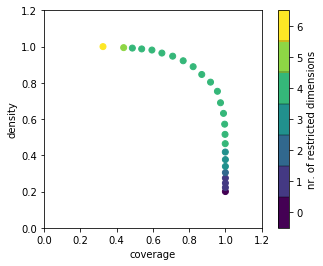

In [111]:
import matplotlib.pyplot as plt
 
box1.show_tradeoff()
plt.show()

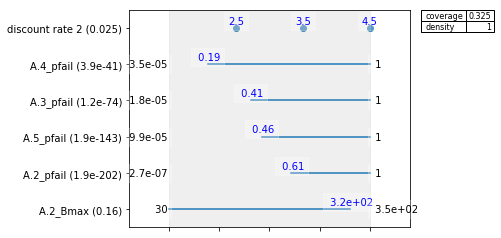

In [112]:
box1.inspect(style='graph')
plt.show()

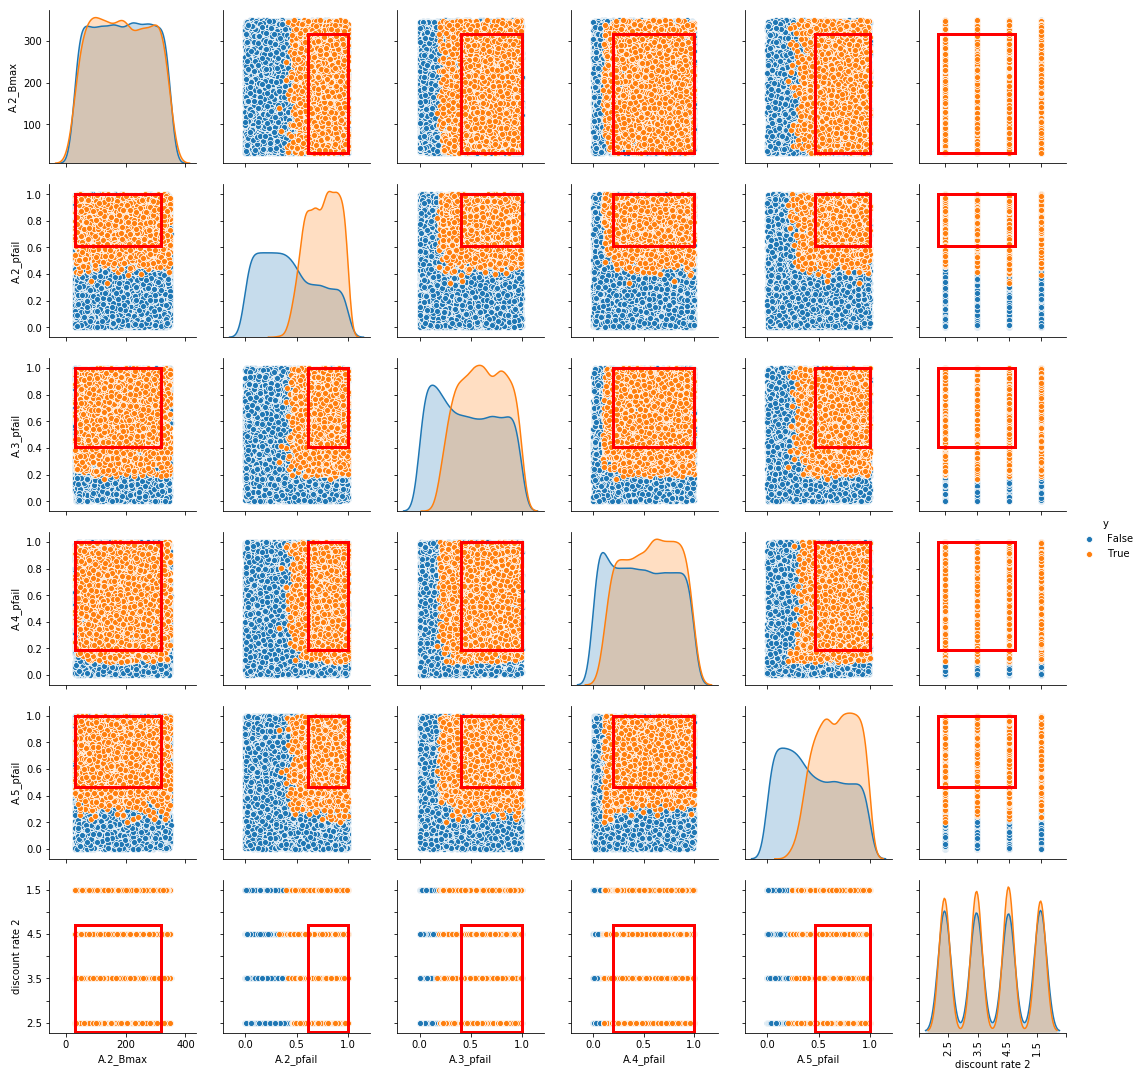

In [113]:
#box1.select(5)
fig = box1.show_pairs_scatter()
#fig.set_size_inches((12,12))
plt.show()

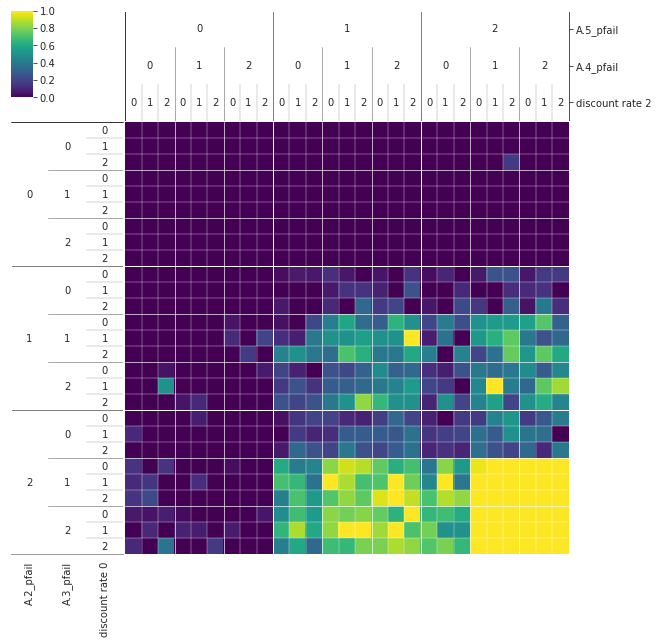

In [114]:
from ema_workbench.analysis import dimensional_stacking
dimensional_stacking.create_pivot_plot(x, y)
plt.show()

In [118]:
!pip install ema_workbench -U

  Stored in directory: C:\Users\anja\AppData\Local\pip\Cache\wheels\95\16\8c\aa926c39b8e30896d3b0de93ac2757371df34c8d2a5ca0abca
Successfully built ema-workbench
  Found existing installation: ema-workbench 2.0.2
    Uninstalling ema-workbench-2.0.2:
      Successfully uninstalled ema-workbench-2.0.2
